<a href="https://colab.research.google.com/github/MAboElFottouh/Predicting-disaster-tweets/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [351]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [352]:
import nltk
import re
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation

Load the dataset

In [353]:
train = pd.read_csv("/content/drive/MyDrive/train.csv")
test = pd.read_csv("/content/drive/MyDrive/test.csv")

Check head and info of the data

In [354]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [355]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


Is there a missing data

In [356]:
train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [357]:
test.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

How many data in each class

In [358]:
print('shape of train data : ',train.shape)
print('shape of test  data : ',test.shape)

shape of train data :  (7613, 5)
shape of test  data :  (3263, 4)


Get the top 15 locations of the data

In [359]:
train['location'].value_counts()[:15] #view 0 to 14 

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Australia           18
Chicago, IL         18
Name: location, dtype: int64

Get the top 15 keyword in the data

In [360]:
train['keyword'].value_counts()[:15] #view 0 to 14 

fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
collided       40
siren          40
twister        40
windstorm      40
sinkhole       39
Name: keyword, dtype: int64

drop id ,location ,keyword columns

In [361]:
train.drop('location',axis=1, inplace= True)
train.drop('keyword',axis=1, inplace= True)
train.drop('id',axis=1, inplace= True)

In [362]:
test.drop('location',axis=1, inplace= True)
test.drop('keyword',axis=1, inplace= True)
test.drop('id',axis=1, inplace= True)

In [363]:
target = train.drop('text',axis=1) # split column target to work in text only now 

In [364]:
train.drop('target',axis=1, inplace= True)

In [365]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [366]:
train['text'][1].split()

['Forest', 'fire', 'near', 'La', 'Ronge', 'Sask.', 'Canada']

What are the most common words?

In [367]:
most_stop =[]
most_word =[]
for text in train['text']:
  for word in text.split():
    if word not in stop_words:
      most_word.append(word)
    else :
      most_stop.append(word)


In [368]:
import statistics
from statistics import mode
 
def most_common(List):
    return(mode(List))


print('the most common word : ({})'.format(most_common(most_word)))

the most common word : (I)


 What are the most common stop words

In [369]:
print('the most common stop word : ({})'.format(most_common(most_stop)))

the most common stop word : (the)


Check Balancing

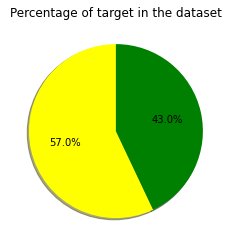

In [370]:
from matplotlib import pyplot as plt
sizes = target.value_counts(sort = True)
colors = ["yellow","green"] 
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of target in the dataset')
plt.show()

In [371]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [372]:
def clean_tweet(tweet):


  clean_tweets = []
  le=WordNetLemmatizer()


  tweet = re.sub(r'(@|#)[A-Za-z0-9_]*','',tweet) #Remove Mentions and hashrag
  tweet = re.sub(r'https?:\/\/\S+','',tweet) #Remove Link
  tweet = re.sub('\W',' ',tweet) #Remove pnuc
  tweet = re.sub('^\s+','',tweet) #Remove space
  tweet = re.sub('\s+$','',tweet) #Remove space
  tweet = re.sub('\s\d+\s','',tweet) #Remove digit
  


  clean_tweet = [le.lemmatize(word.lower()) for word in tweet.split() if (word.lower() not in stop_words)   ]





  return clean_tweet


In [373]:
clean_tweets = []
for tweett in train['text']:
  clean_tweets.append(clean_tweet(tweett))

In [374]:
# Tokenizer the Tweets

In [375]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_tweets)
tweets = tokenizer.texts_to_sequences(clean_tweets)

Padding

In [376]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
tweets = pad_sequences(tweets)

In [377]:
len(tweets[1])

23

In [378]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(tweets,target)

# **LSTM**

In [379]:
import tensorflow as tf

In [402]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,Embedding,Bidirectional

model = Sequential()

model.add(Embedding(len(tokenizer.word_index)+1,10,input_length=len(tweets[1])))
model.add(Bidirectional(LSTM(5)))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss="binary_crossentropy",optimizer='RMSprop',metrics=['accuracy'])
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_32 (Embedding)    (None, 23, 10)            127280    
                                                                 
 bidirectional_32 (Bidirecti  (None, 10)               640       
 onal)                                                           
                                                                 
 dense_107 (Dense)           (None, 32)                352       
                                                                 
 dropout_51 (Dropout)        (None, 32)                0         
                                                                 
 dense_108 (Dense)           (None, 32)                1056      
                                                                 
 dropout_52 (Dropout)        (None, 32)                0         
                                                     

In [403]:
history = model.fit(train_x,train_y,validation_data=(test_x,test_y),batch_size=800,verbose=1,epochs=10)


Epoch 1/10
8/8 [==============================] - 6s 194ms/step - loss: 0.6891 - accuracy: 0.5584 - val_loss: 0.6827 - val_accuracy: 0.5793
Epoch 2/10
8/8 [==============================] - 0s 43ms/step - loss: 0.6822 - accuracy: 0.5663 - val_loss: 0.6756 - val_accuracy: 0.5793
Epoch 3/10
8/8 [==============================] - 0s 41ms/step - loss: 0.6747 - accuracy: 0.5681 - val_loss: 0.6659 - val_accuracy: 0.5793
Epoch 4/10
8/8 [==============================] - 0s 43ms/step - loss: 0.6631 - accuracy: 0.5826 - val_loss: 0.6529 - val_accuracy: 0.5882
Epoch 5/10
8/8 [==============================] - 0s 42ms/step - loss: 0.6461 - accuracy: 0.6197 - val_loss: 0.6377 - val_accuracy: 0.6985
Epoch 6/10
8/8 [==============================] - 0s 42ms/step - loss: 0.6245 - accuracy: 0.6872 - val_loss: 0.6123 - val_accuracy: 0.6912
Epoch 7/10
8/8 [==============================] - 0s 41ms/step - loss: 0.5957 - accuracy: 0.7225 - val_loss: 0.5892 - val_accuracy: 0.7679
Epoch 8/10
8/8 [==========

Text(0.5, 0, 'Epochs')

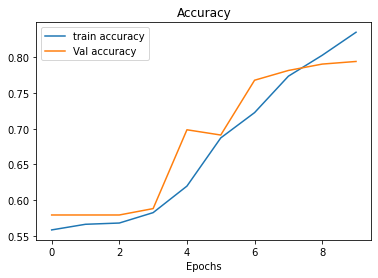

In [404]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train accuracy','Val accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')

# stop in epoch 7

Text(0.5, 0, 'epochs')

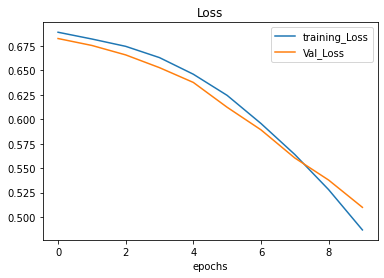

In [405]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training_Loss','Val_Loss'])
plt.title('Loss')
plt.xlabel('epochs')

In [406]:
model.evaluate(test_x,test_y,verbose=2)

60/60 - 0s - loss: 0.5099 - accuracy: 0.7941 - 243ms/epoch - 4ms/step


[0.5098801255226135, 0.7941176295280457]

# save model

In [413]:

from keras.models import load_model
model.save("model.h5")

# load model 

In [415]:
loaded_model = load_model("/content/drive/MyDrive/model.h5")
loss, accuracy = loaded_model.evaluate(test_x, test_y)

60/60 [==============================] - 1s 5ms/step - loss: 0.5099 - accuracy: 0.7941
